In [1]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [2]:
arg01 <- "tenx" #library name: tenx, dropseq, mca
arg02 <- "filtered_feature_bc_matrix/" #10X directory, dropseq / mca count matrix
arg03 <- "3_injury" #project name
arg04 <- "3_injury.rds"  #output file name for saveRDS function

In [3]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
21223 features across 8441 samples within 1 assay 
Active assay: RNA (21223 features)


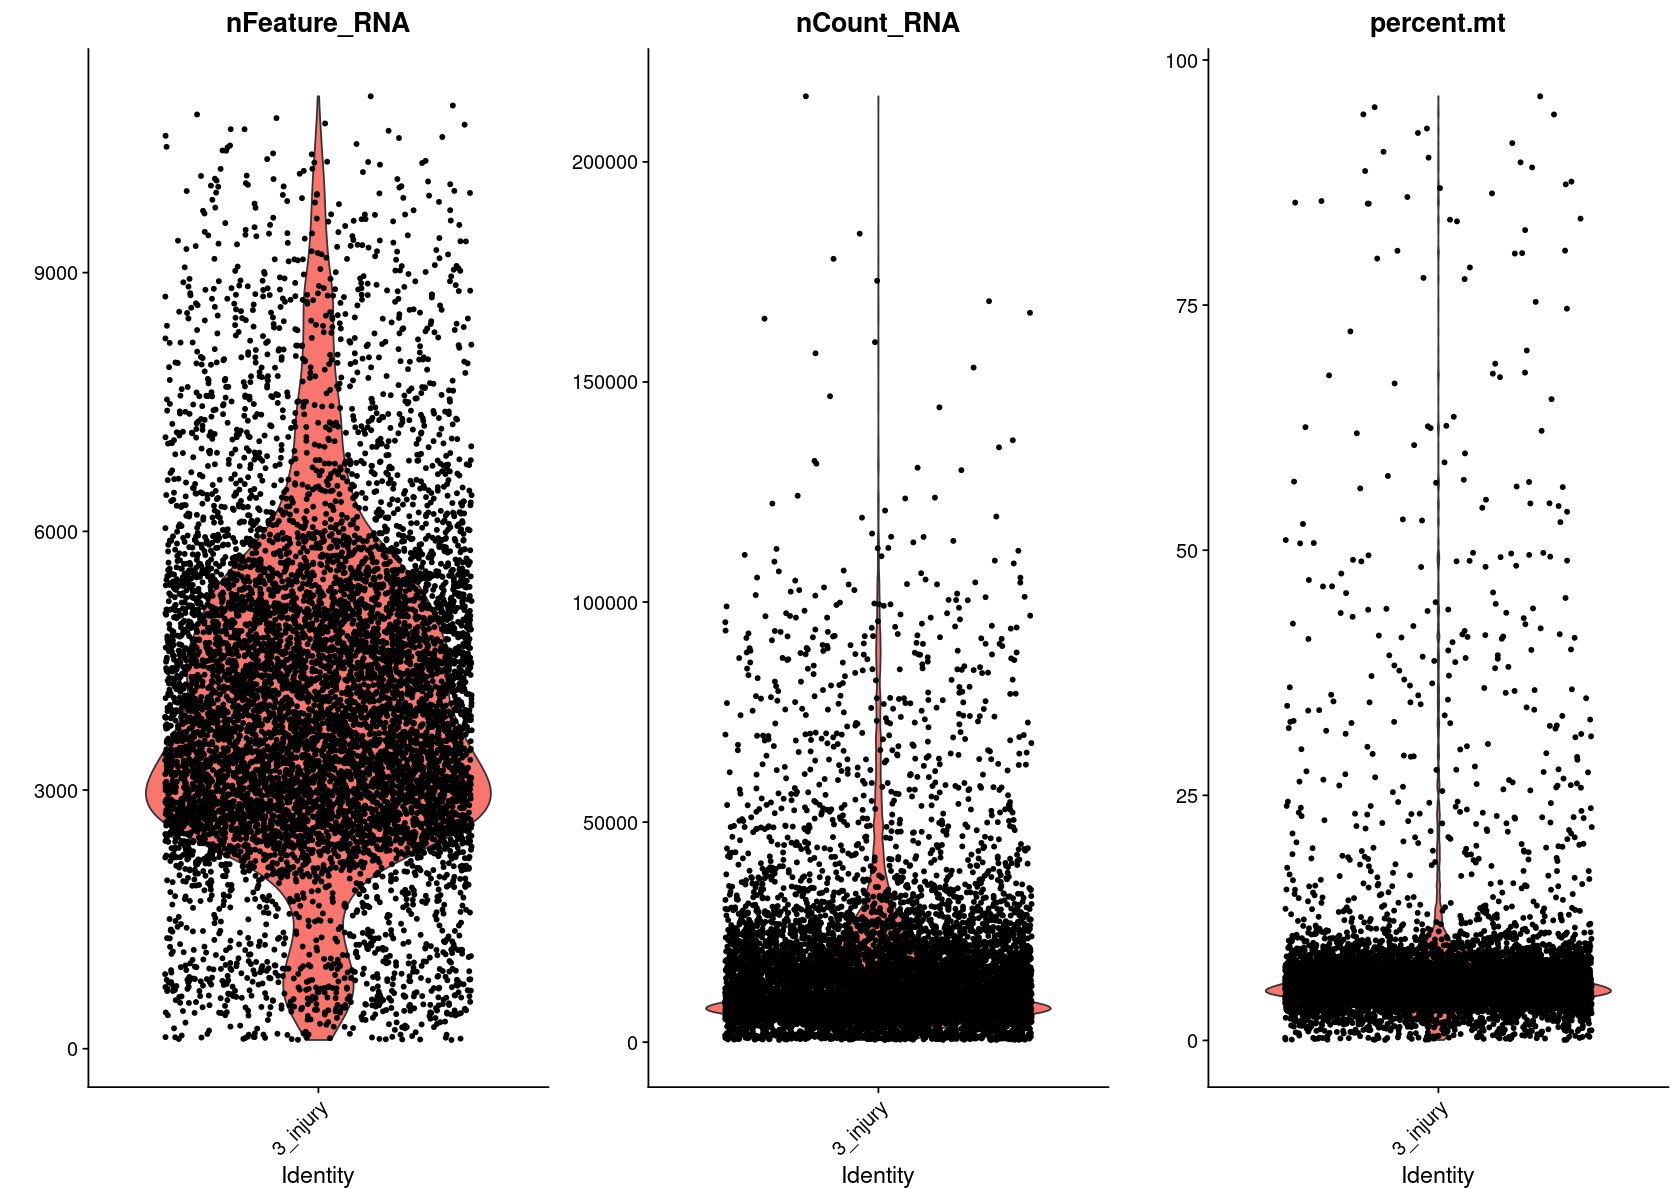

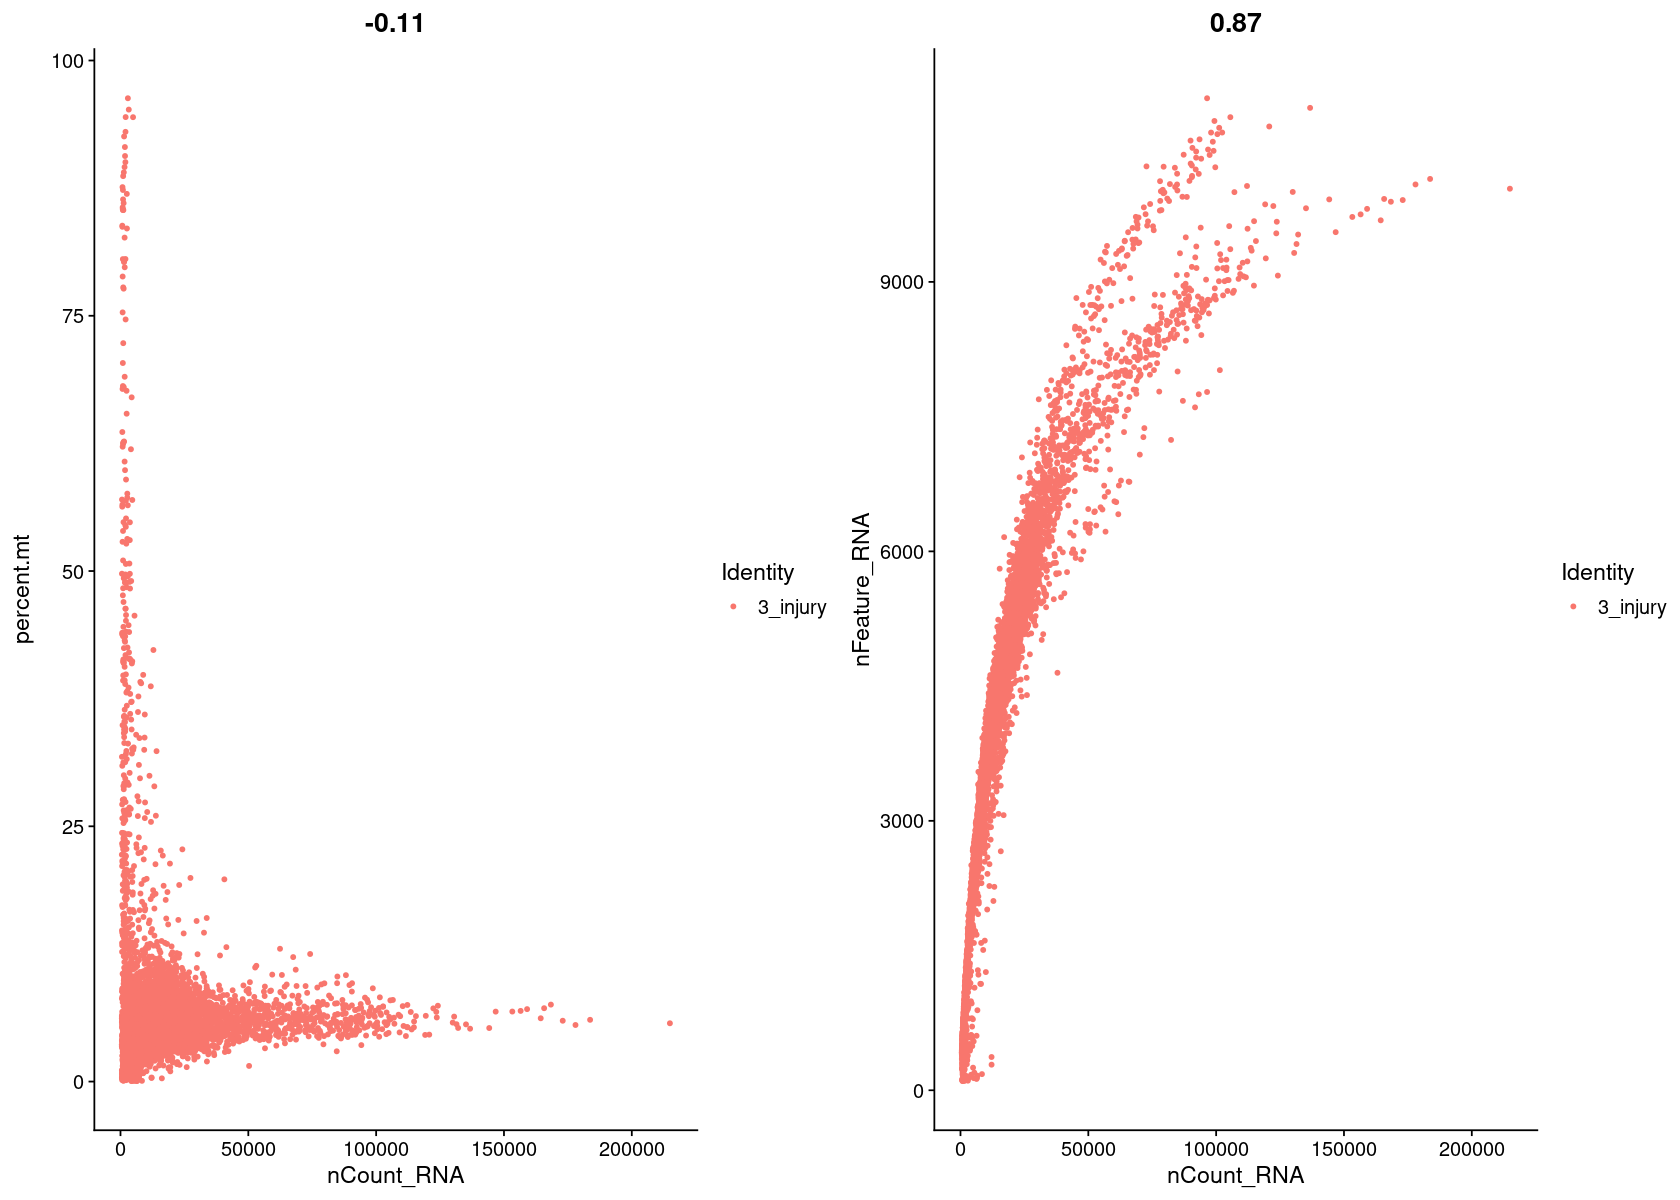

In [4]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [5]:
arg05 <- 100 #nFeature_RNA_min
arg06 <- 10000 #nFeature_RNA_max
arg07 <- 10 #nCount_RNA_min
arg08 <- 100000 #nCount_RNA_max
arg09 <- 50 #percent.mt_max

An object of class Seurat 
21223 features across 8270 samples within 1 assay 
Active assay: RNA (21223 features)


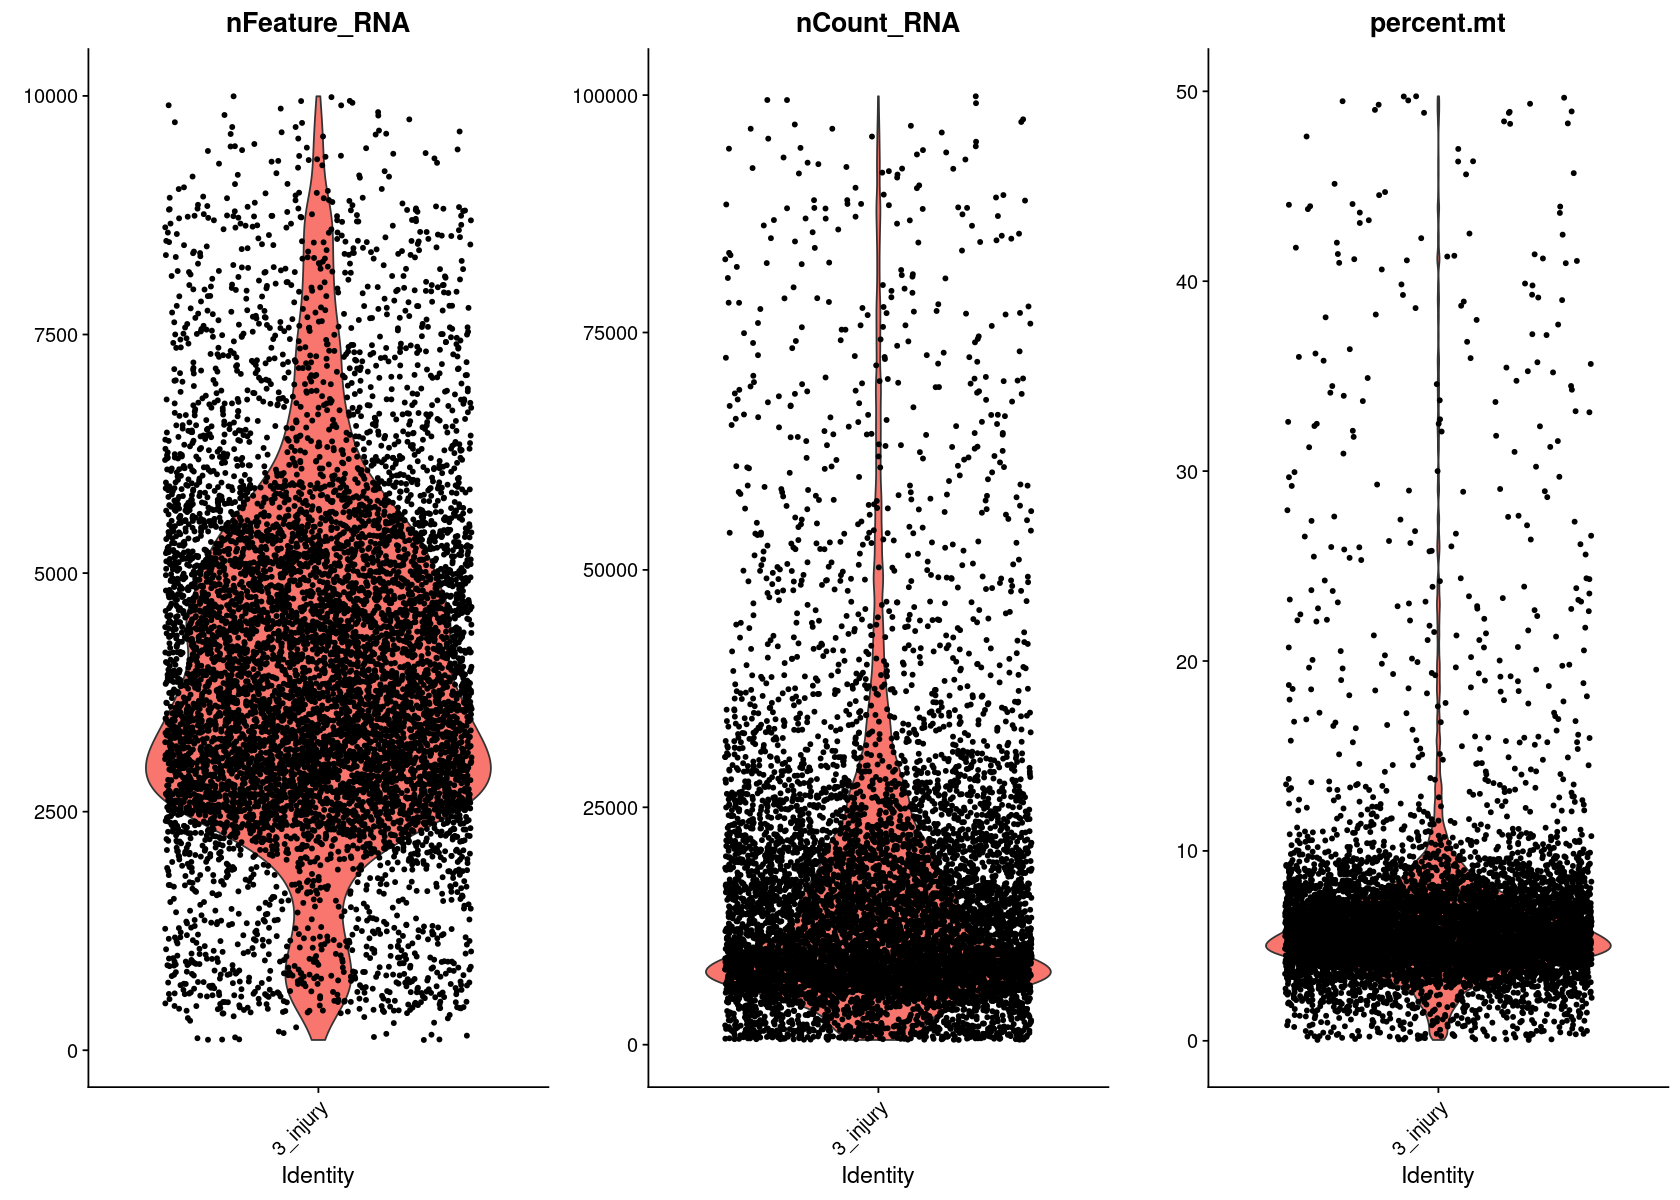

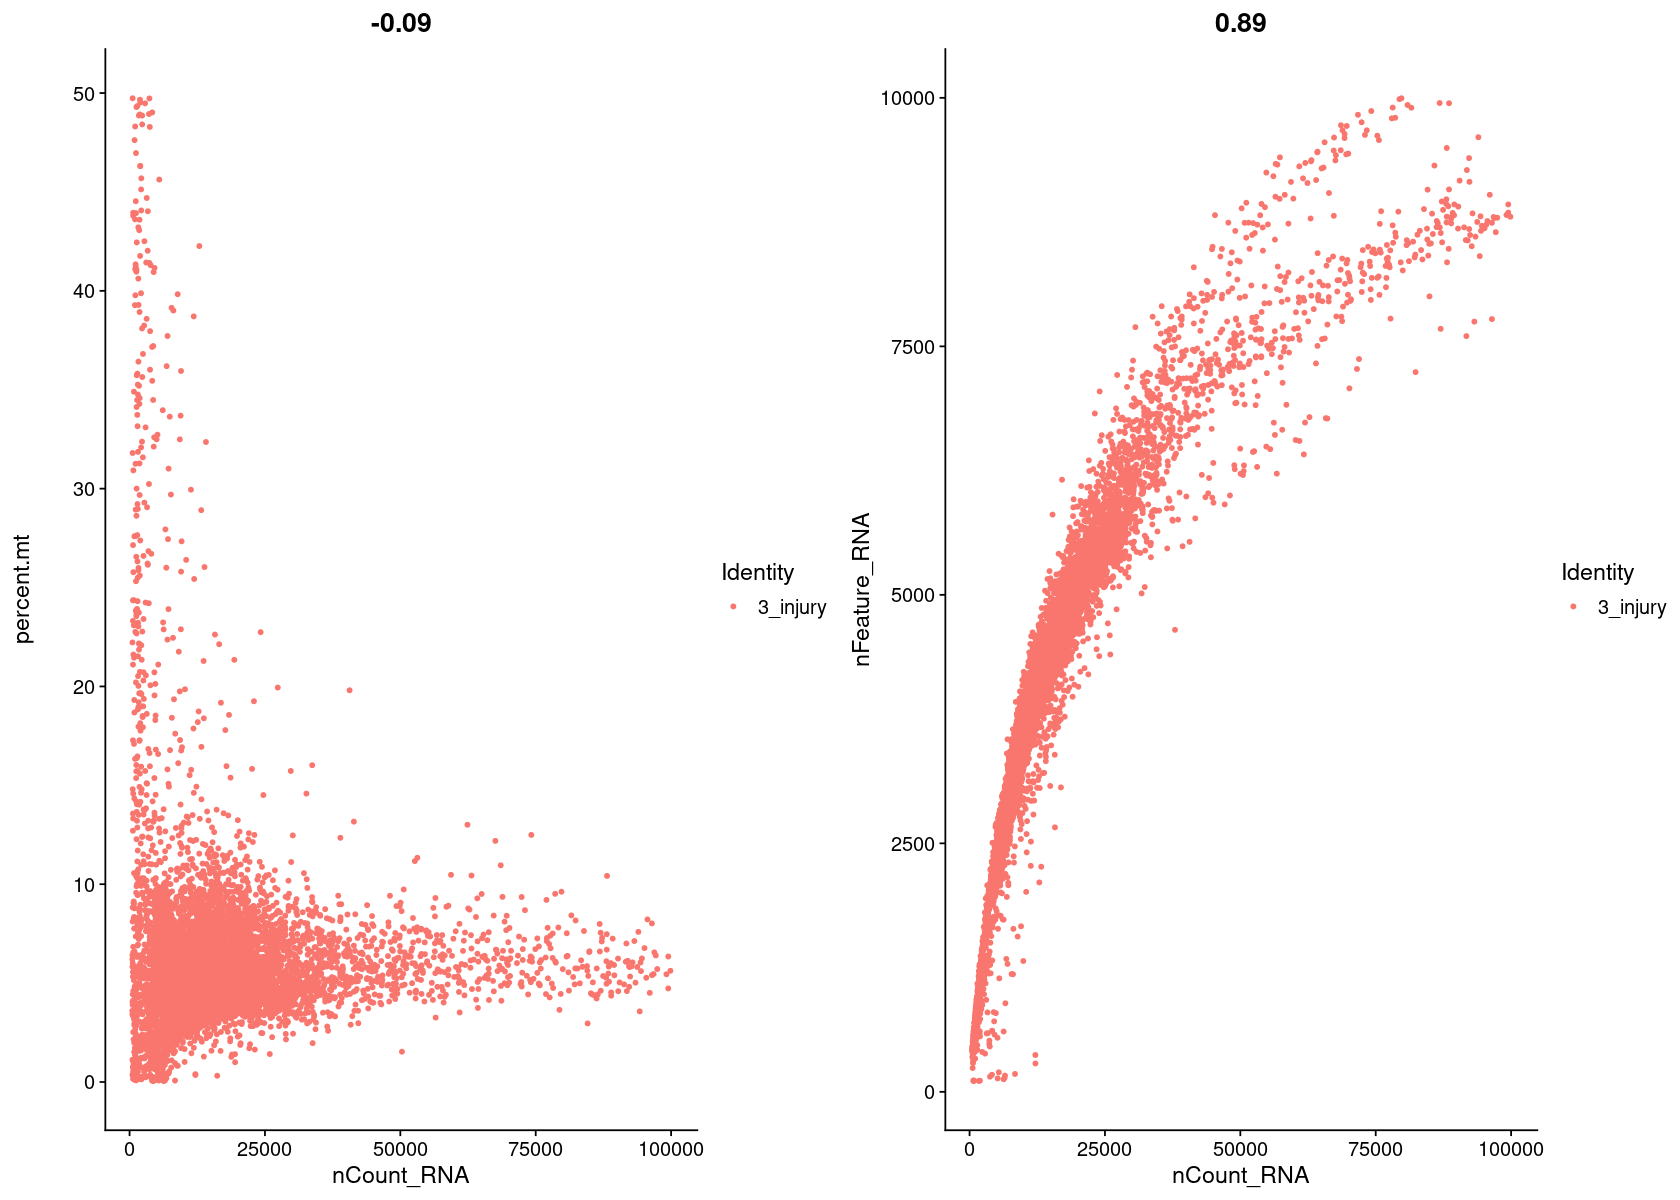

In [6]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


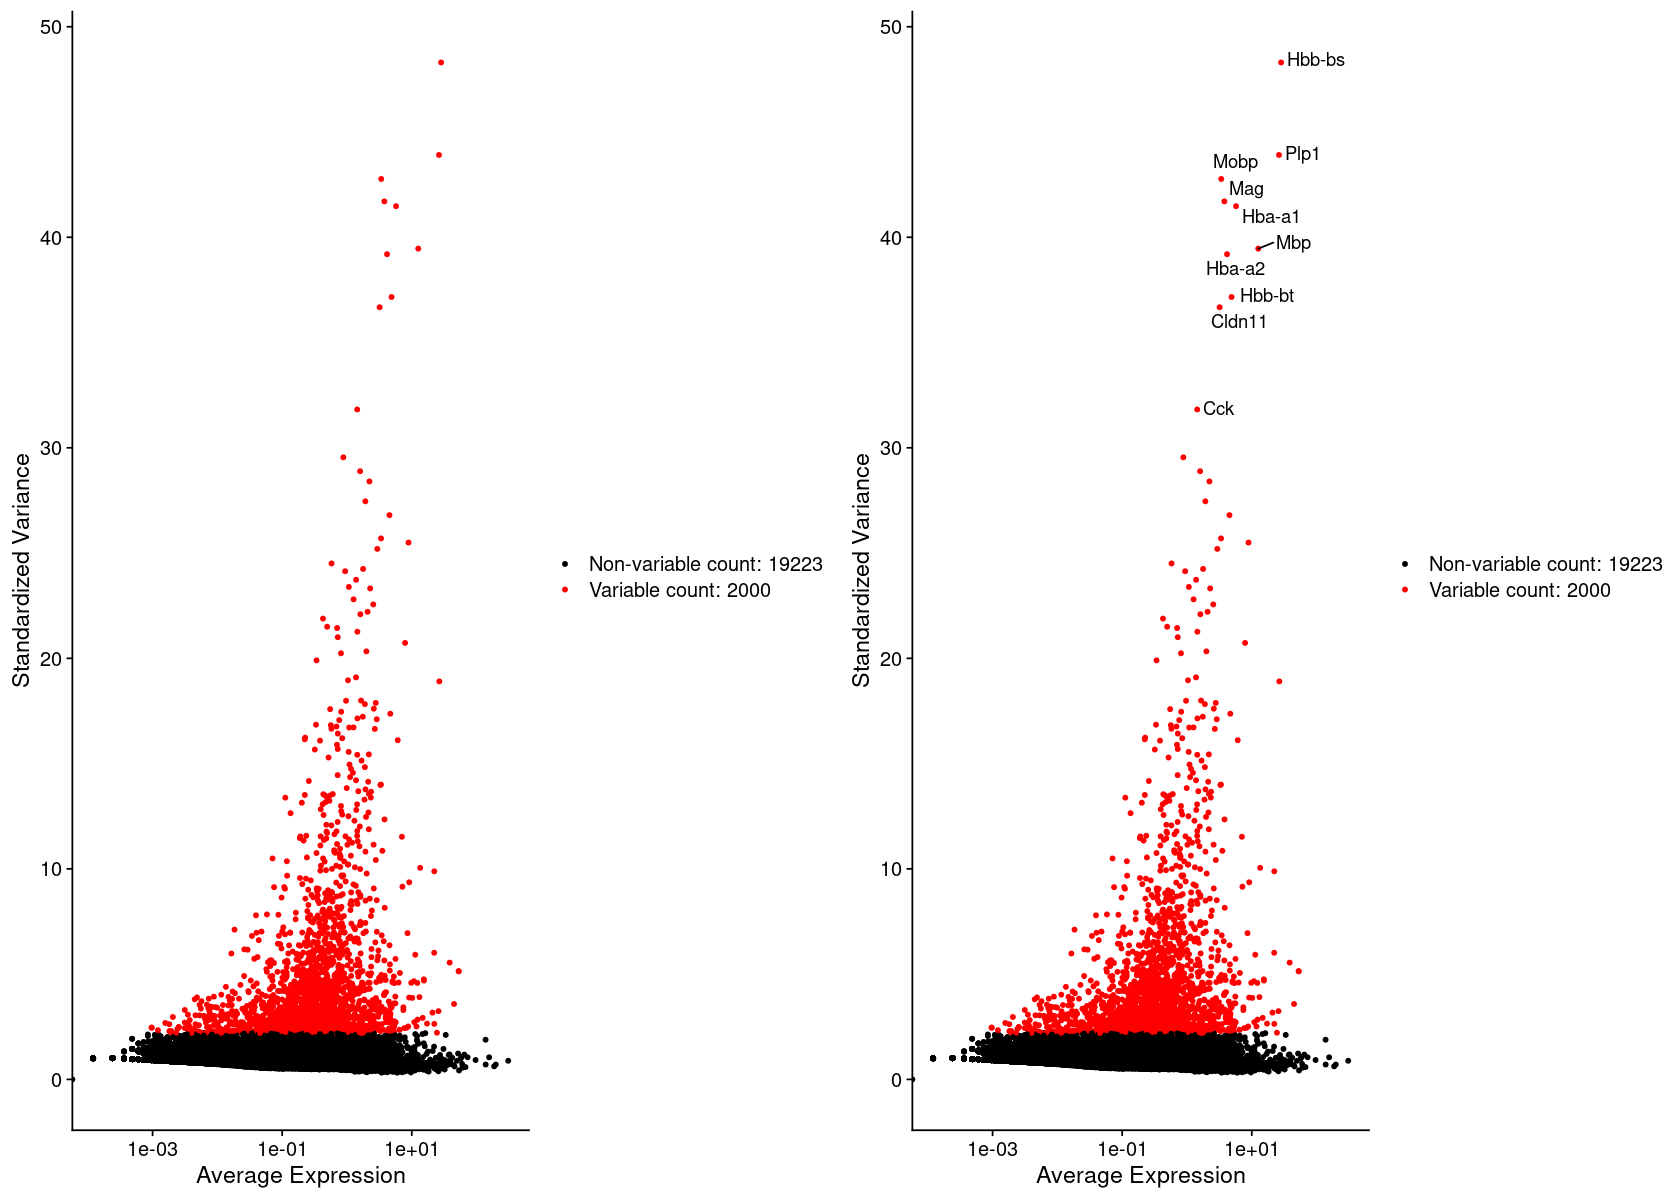

In [7]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Regressing out percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  Tm4sf1, Meig1, Dynlrb2, Rsph1, Ak7, 1700007K13Rik, 1700016K19Rik, 1110017D15Rik, Ccdc153, Rarres2 
	   Cfap54, Foxj1, Tppp3, Ccdc113, Spef2, Dnah6, Tmem212, Efcab10, Cfap126, 1700001C02Rik 
	   Dnali1, Pifo, Fam183b, Dmkn, Dnah9, Capsl, Pltp, Rsph4a, Gm19935, Odf3b 
Negative:  Basp1, Stmn3, Stmn2, Mllt11, Ttc9b, Bex2, Celf4, Stmn4, Gng3, Rtn1 
	   Myt1l, Kif5c, Aplp1, Gad1, Rab3a, Mapt, Pcdh9, Ywhag, Pdxp, Ina 
	   Rab6b, Olfm1, Klc1, Bex1, Adarb2, Fyn, Trp53i11, Peli1, Nell2, Snap25 
PC_ 2 
Positive:  Rtn1, Nnat, Hsp90aa1, Slc38a1, Bex2, 1700016K19Rik, Dynlrb2, Ak7, Ccdc153, Rsph1 
	   1110017D15Rik, Meig1, Fam183b, 1700007K13Rik, 1700012B09Rik, Ccdc113, 1700001C02Rik, Efcab10, Ly6h, Dmkn 
	   Drc3, Tmem212, Spag6l, Cfap206, Pifo, Dnali1, Cfap54, Zcchc18, Odf3b, Dnah12 
Negative:  Esam, Flt1, Eng, Cd93, Foxq1, Adgrf5, Cldn5, BC028528, Adgrl4, Cdh5 
	   Vwa1, Kdr, Ctla2a, Slc22a8, Ecscr, Grap, Slc39a8, Cd34

PC_ 1 
Positive:  Tm4sf1, Meig1, Dynlrb2, Rsph1, Ak7 
Negative:  Basp1, Stmn3, Stmn2, Mllt11, Ttc9b 
PC_ 2 
Positive:  Rtn1, Nnat, Hsp90aa1, Slc38a1, Bex2 
Negative:  Esam, Flt1, Eng, Cd93, Foxq1 
PC_ 3 
Positive:  B230209E15Rik, Sncb, Syt1, Snhg11, Slc17a7 
Negative:  Hmgb2, Pclaf, Top2a, Pbk, Cenpf 
PC_ 4 
Positive:  Lrp8, Nnat, Tsc22d1, Csrp2, Flt1 
Negative:  Fcer1g, Ctss, C1qc, Tyrobp, C1qb 
PC_ 5 
Positive:  Cnp, Ugt8a, Gal3st1, Sirt2, Scrg1 
Negative:  Calm2, Stmn2, Basp1, Celf4, Stmn3 


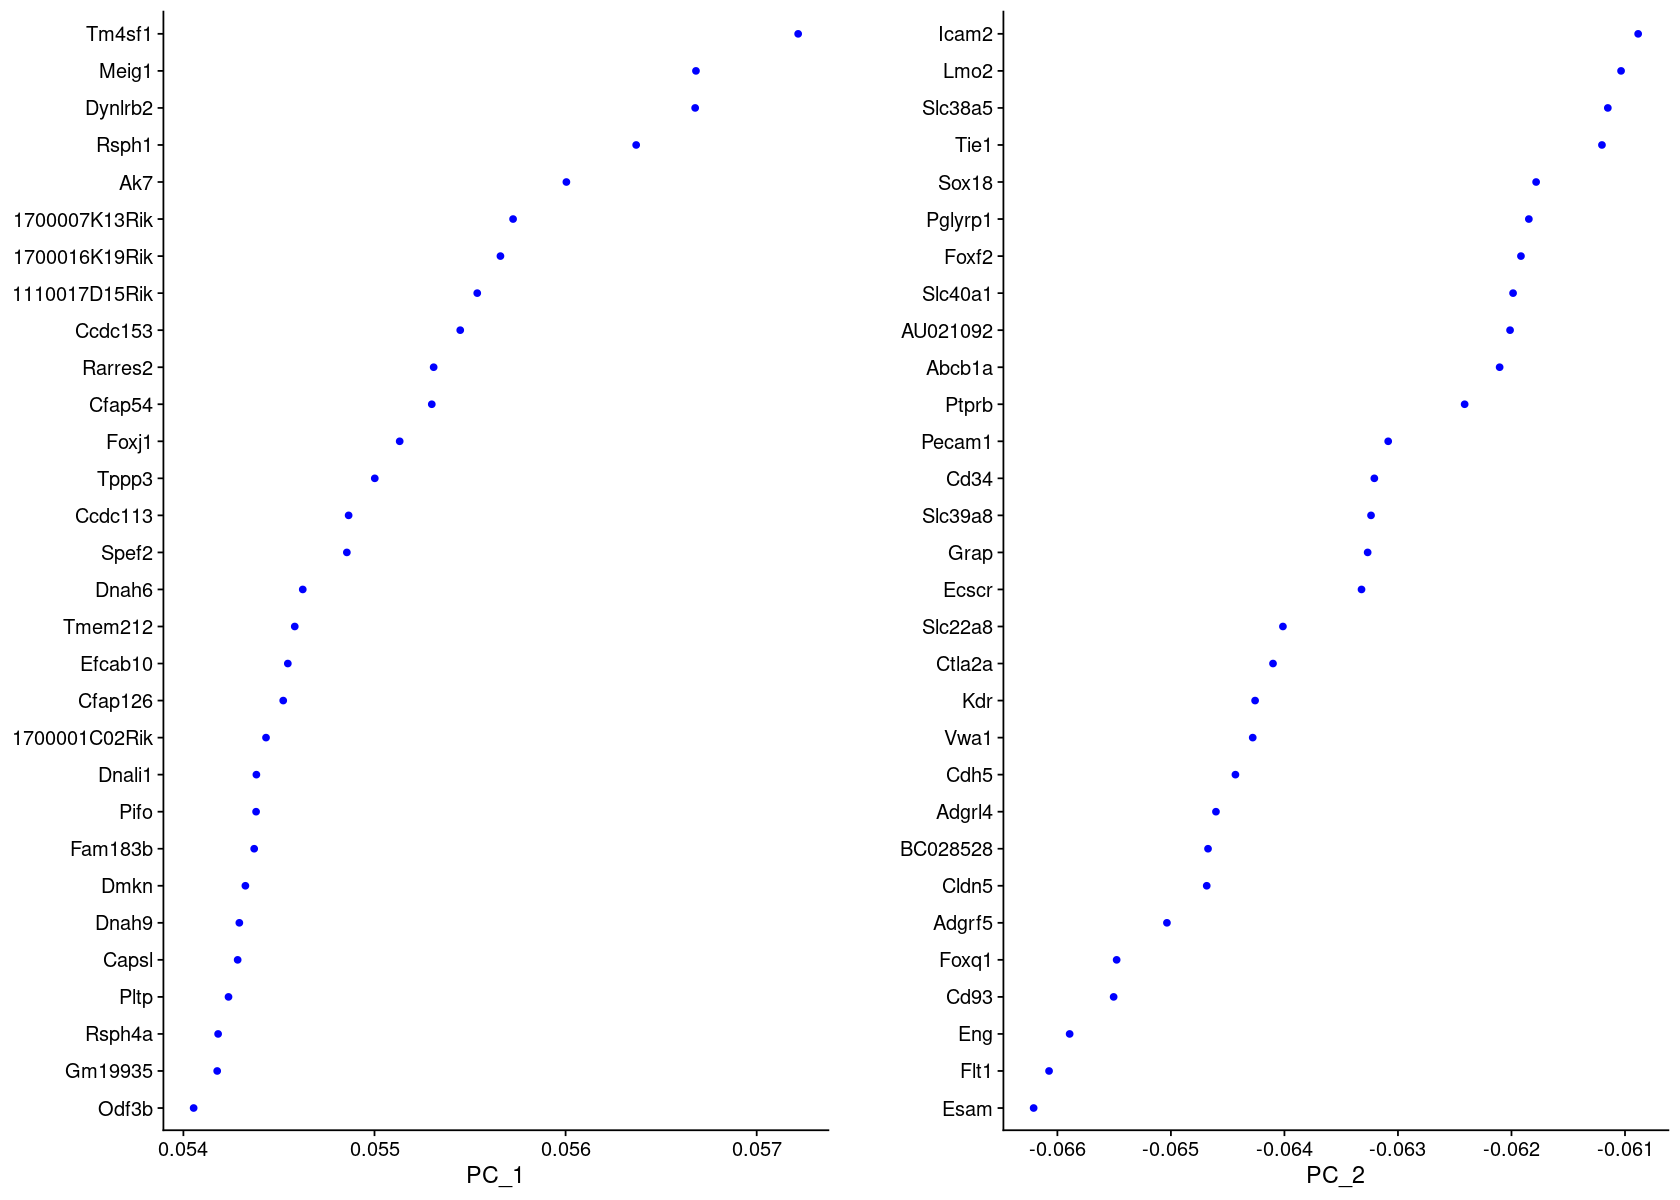

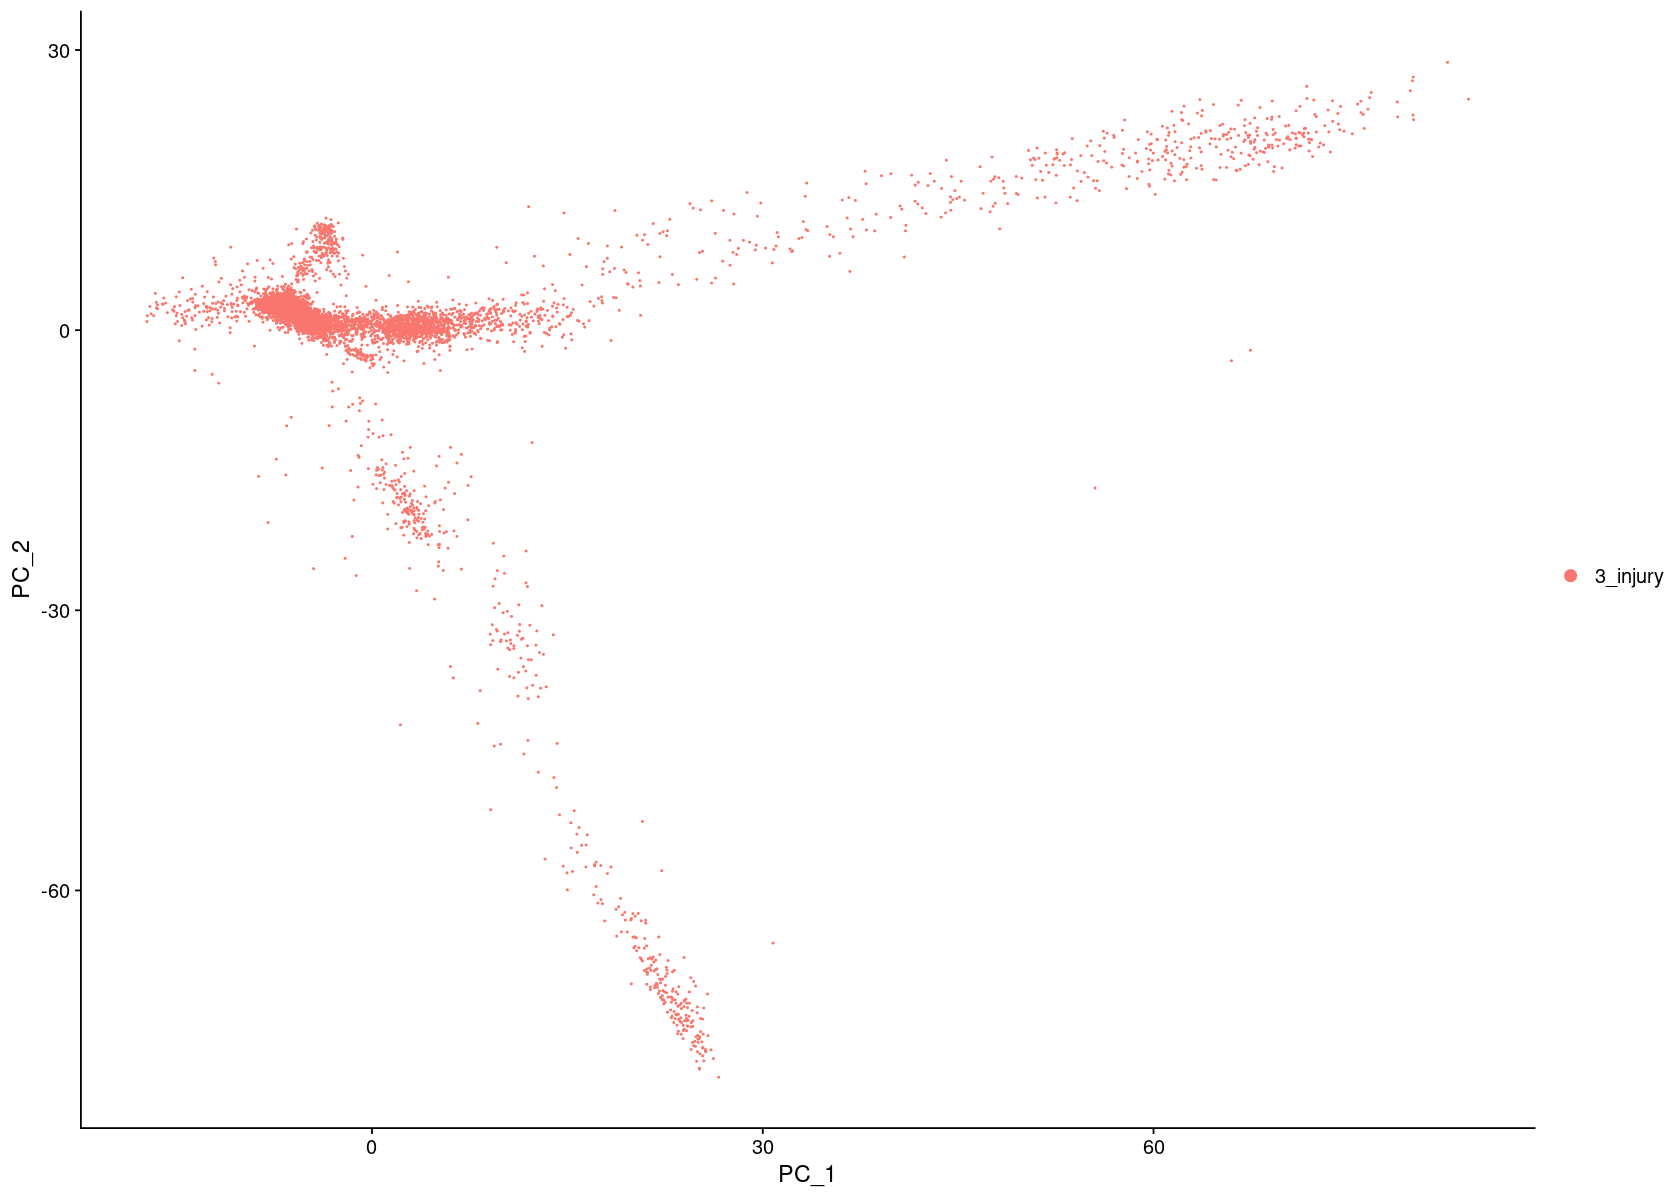

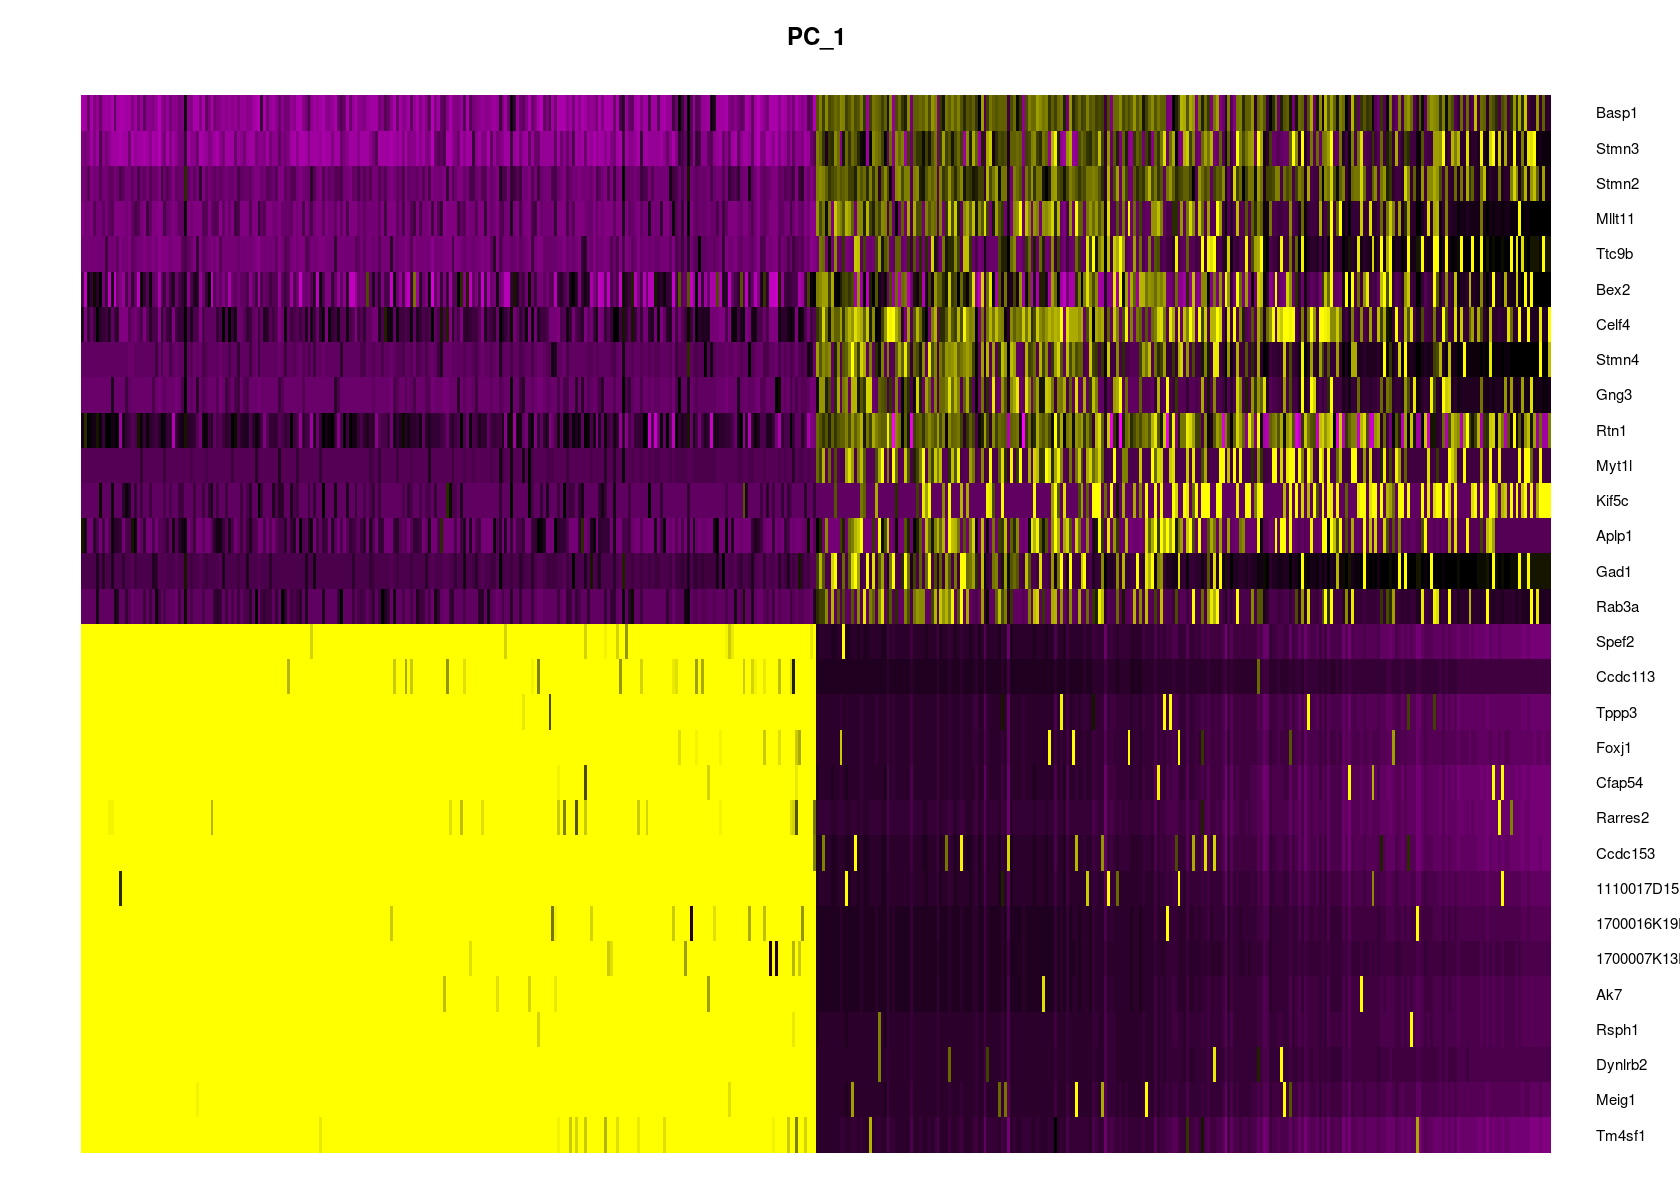

In [8]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, vars.to.regress='percent.mt')
#tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

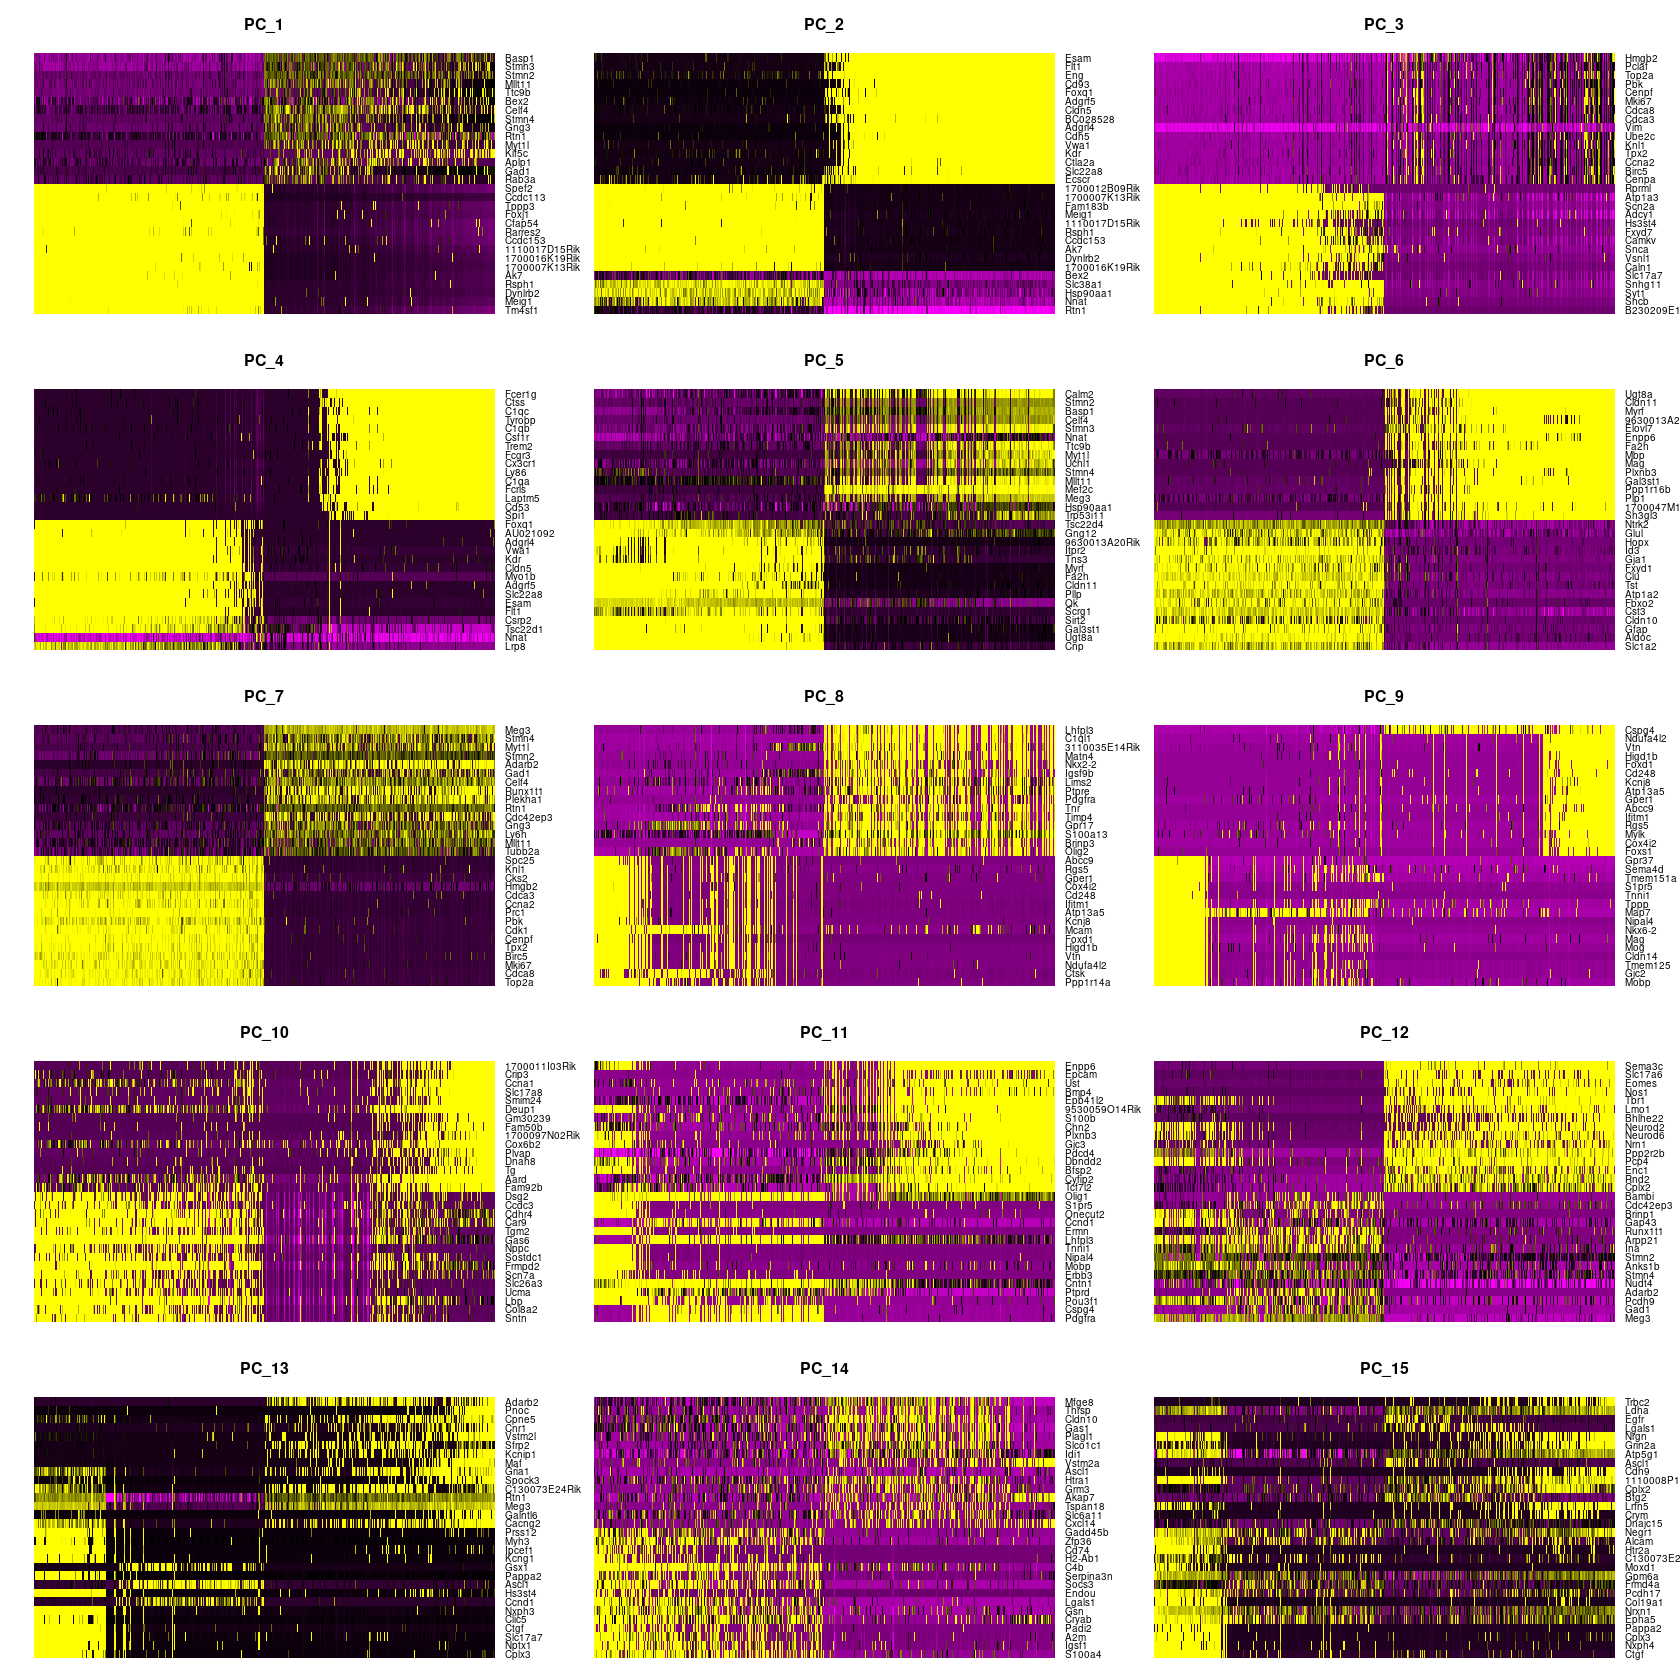

In [9]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 28000 rows containing missing values (geom_point).”


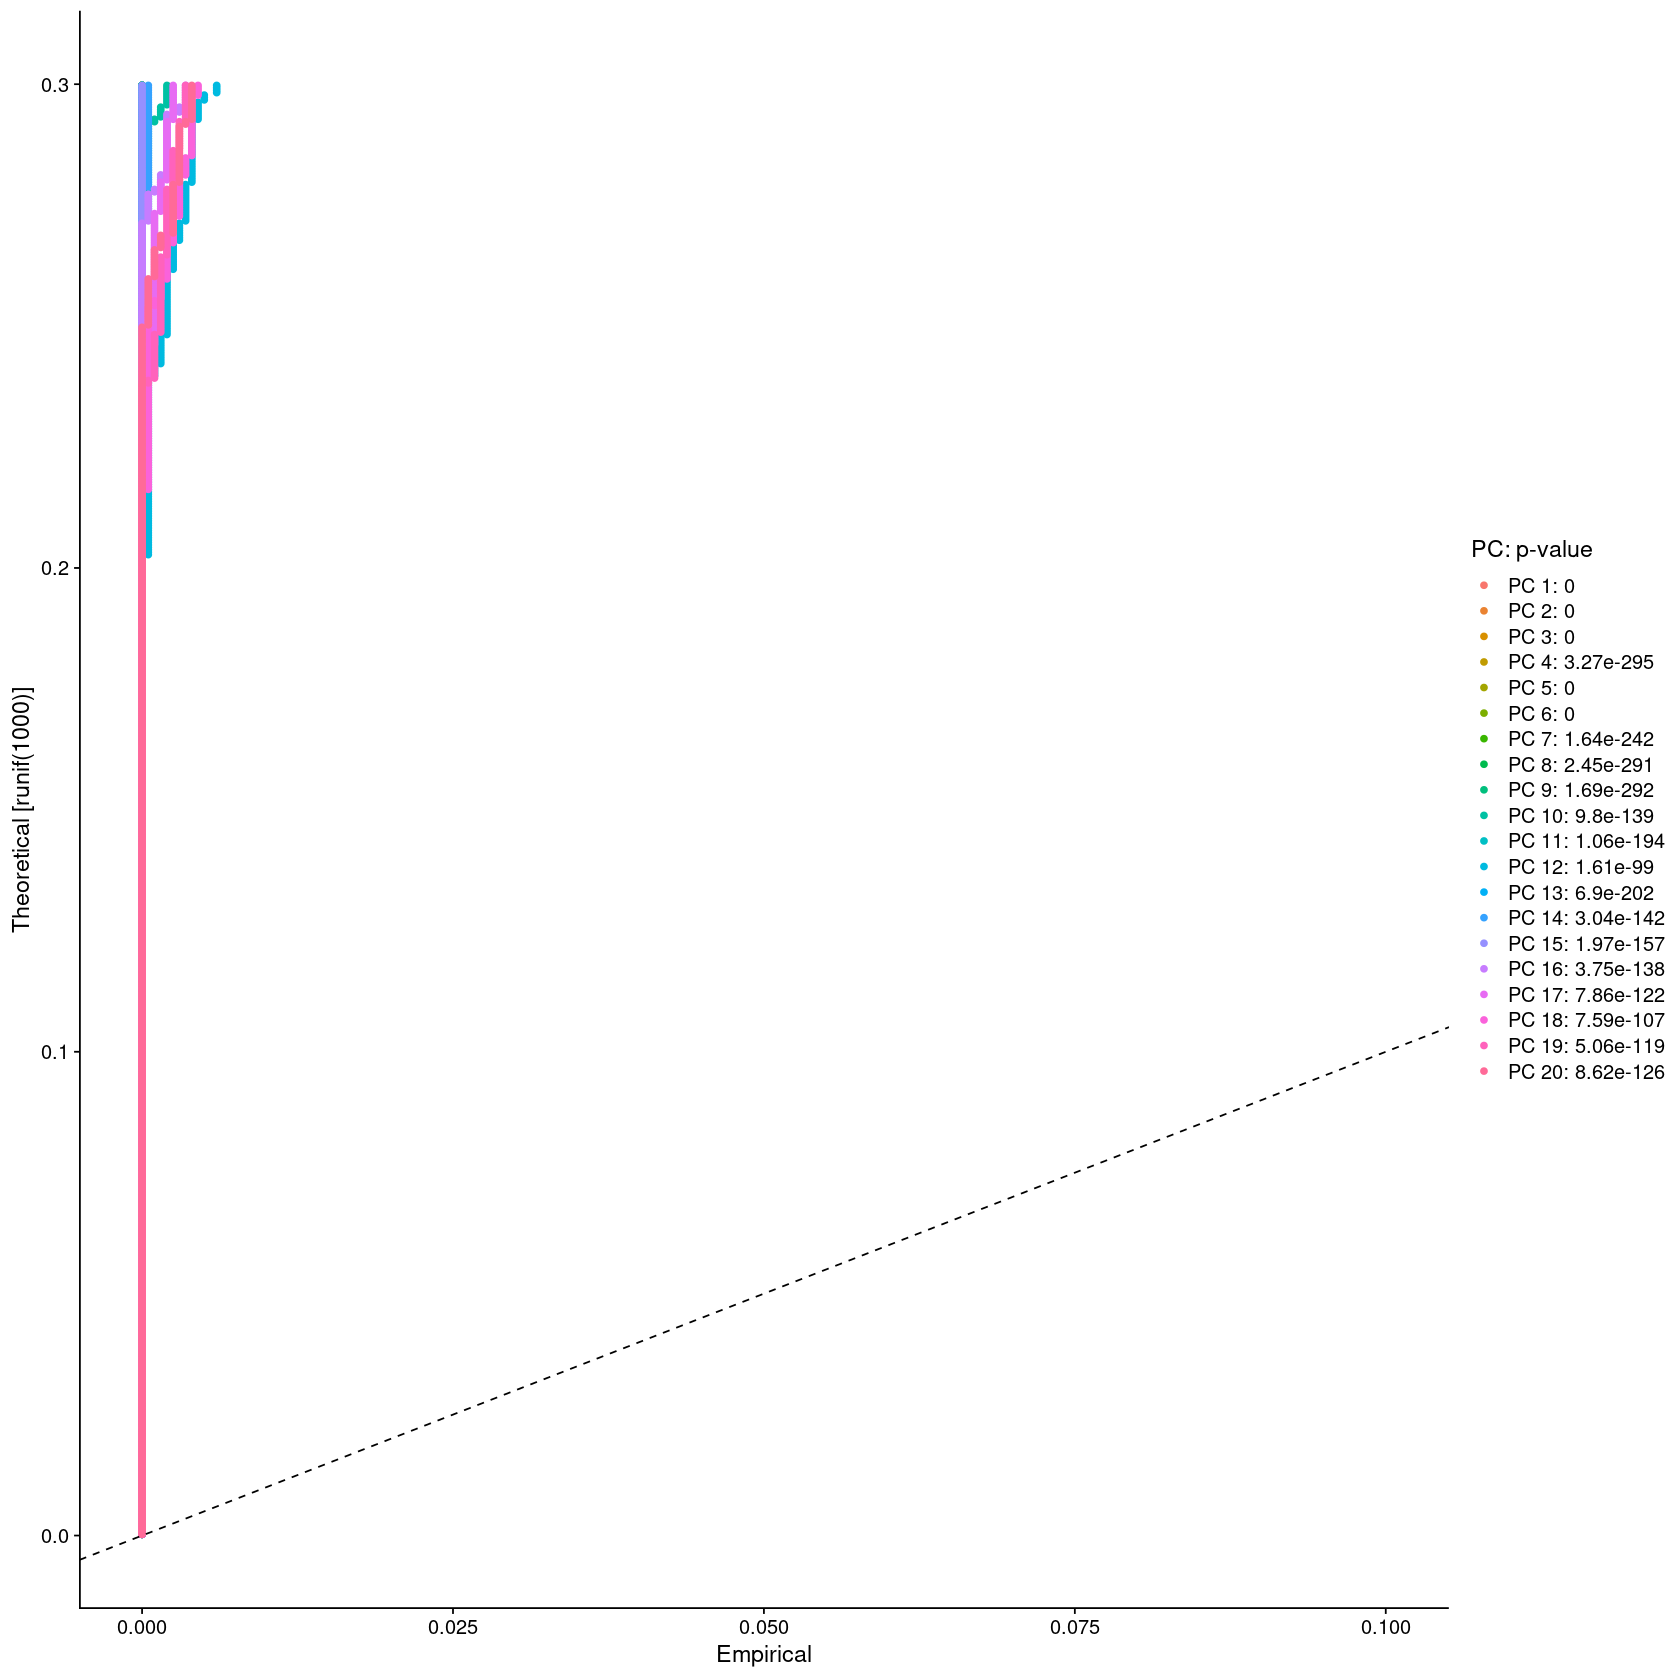

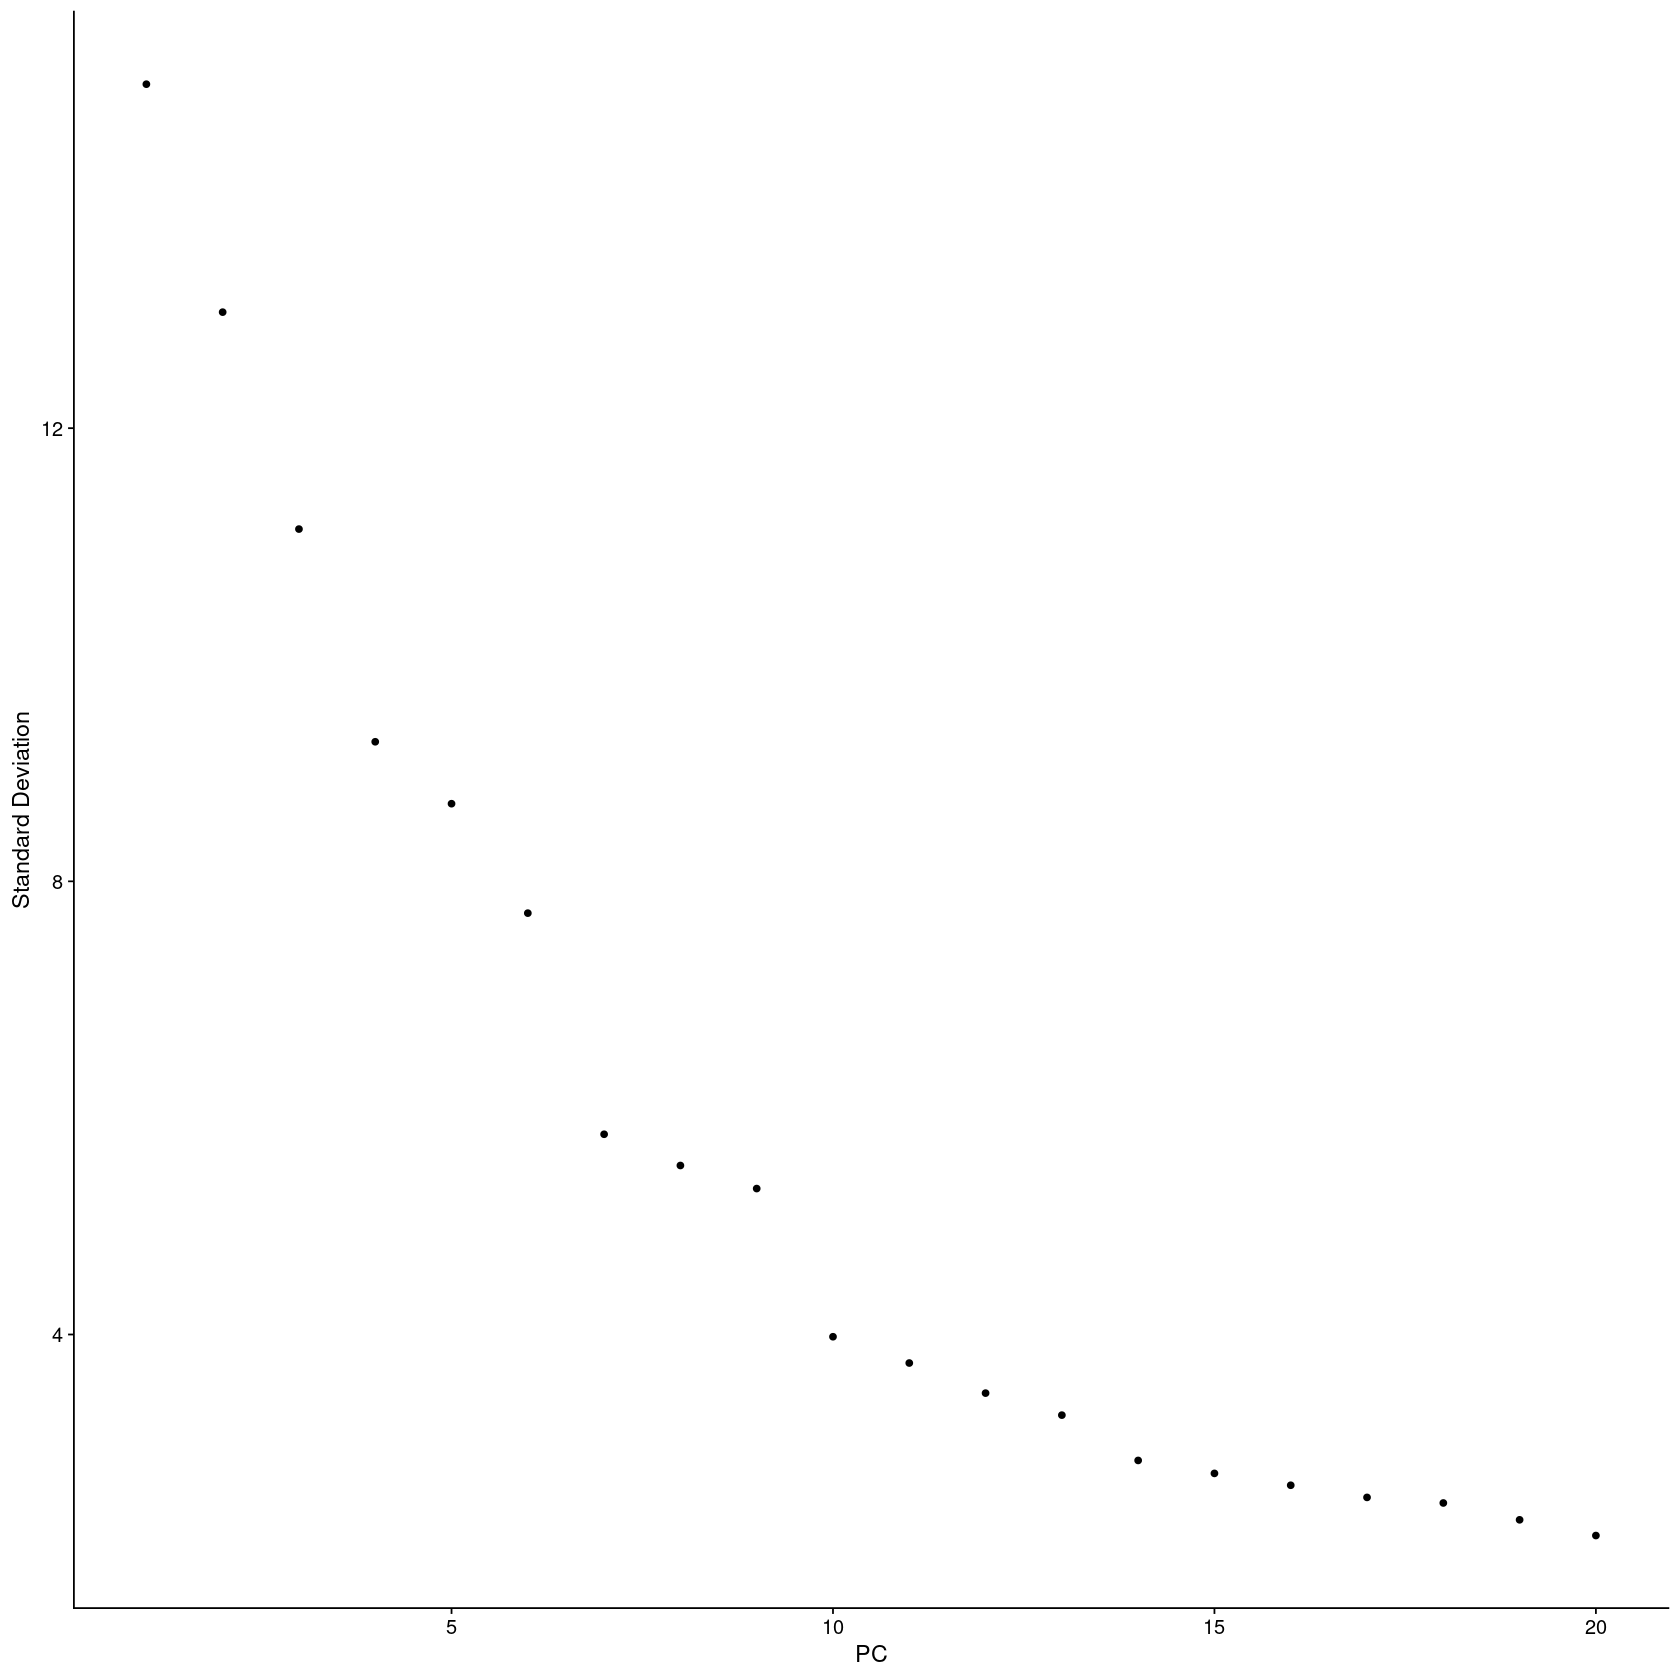

In [10]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [11]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8270
Number of edges: 298832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9095
Number of communities: 25
Elapsed time: 9 seconds


AAACCCAAGCTGAAGC AAACCCACACGACGTC AAACCCACACTTCATT AAACCCACATACGCAT 
               8               18               14               15 
AAACCCACATGGAAGC 
               2 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

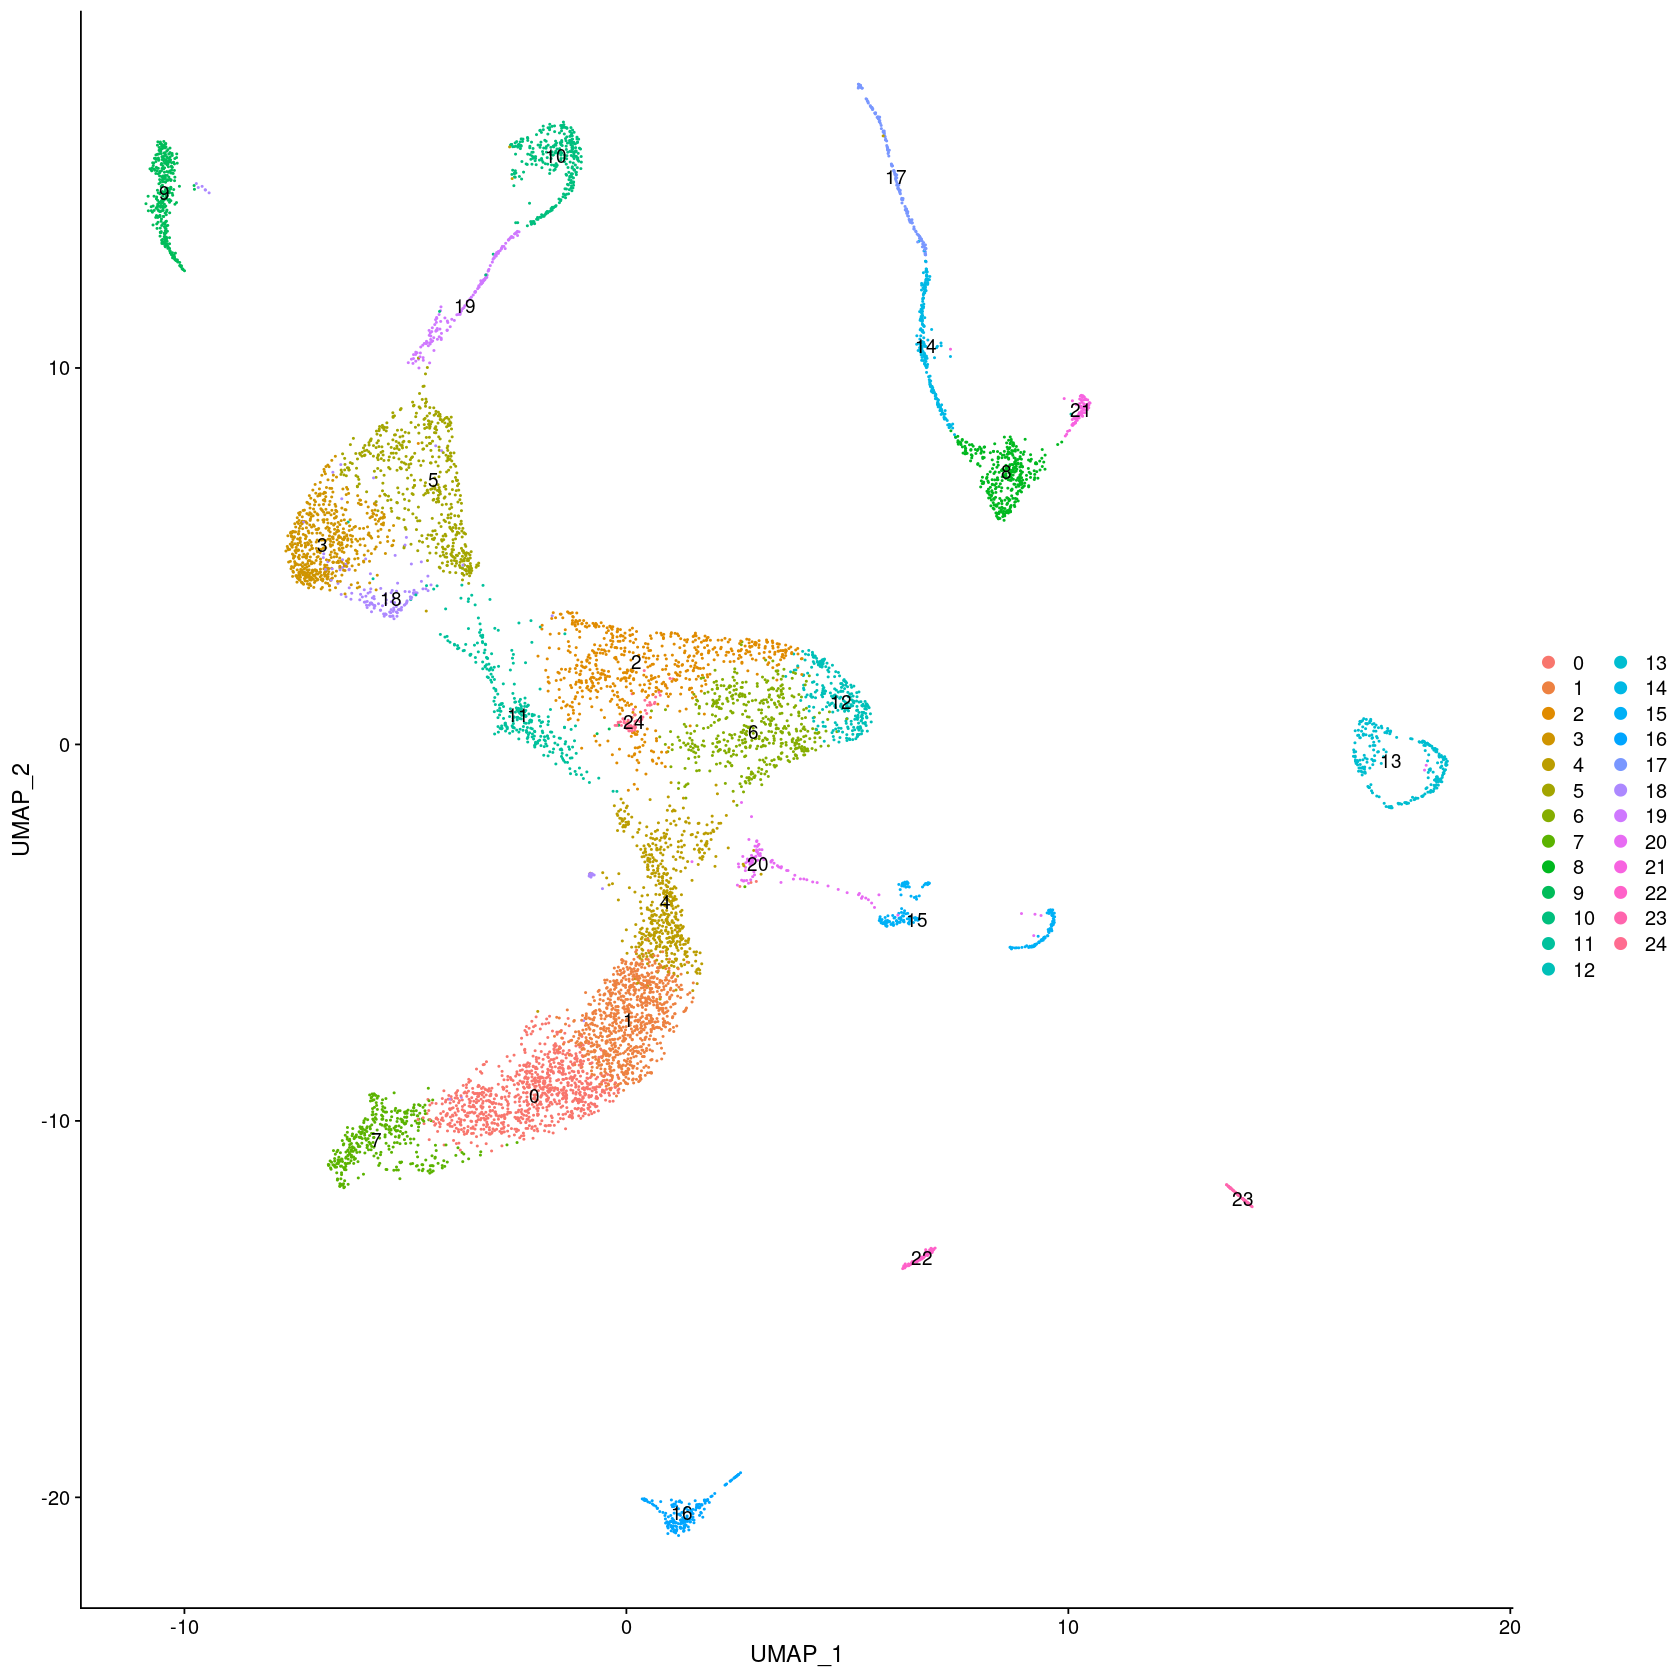

In [12]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10, umap.method='umap-learn', metric='correlation')
DimPlot(tmp, reduction="umap", label=TRUE)

In [13]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.3576307,0.999,0.879,0.000000e+00,0,Btg1
0.000000e+00,1.3413431,0.949,0.570,0.000000e+00,0,Meg3
0.000000e+00,1.2567791,0.999,0.658,0.000000e+00,1,Tubb3
0.000000e+00,1.2530073,0.997,0.496,0.000000e+00,1,Tiam2
0.000000e+00,1.6842963,0.980,0.277,0.000000e+00,2,Top2a
0.000000e+00,1.6611046,0.880,0.200,0.000000e+00,2,Hist1h1b
0.000000e+00,2.1306458,1.000,0.436,0.000000e+00,3,Plpp3
0.000000e+00,2.0943042,1.000,0.689,0.000000e+00,3,Ptn
1.500183e-222,1.3046425,0.977,0.797,3.183838e-218,4,Ccnd2


In [14]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [15]:
saveRDS(tmp, file=arg04)

In [16]:
#sample <- readRDS(file=args04)

In [17]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [18]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}